### Estimating VaR
- different statistical methodolgies that can be used to generate the meaningful estimates for value at risk
- There are **AT LEAST** four standard methods for *Calculating VaR*
    1. Historical Volatility: Non Parametric
    2. Variance-Covariance: Parametric Gaussian
    3. Parametric Non-Gaussian
    4. Cornish-Fisher Value at risk: Semi-Parametric

- They all have their pros and cons.
- It a matter of selecting the best suitable given the particular context.



    

##### Historical Methodology
- Calculation of **VaR** based on the **distribution of historical changes** in the value of the **current portfolio** under market prices over the **specified historical observation window**.
- take the sample of returns and look at and throw away the respective worst case based on the given confidence level, and then focusing on the remaining worst outcome.
- Pros 
    1. There is no assumption about asset-retur distribution.
    2. No need to worry about myself specifying the model if I am not even using a model.
- Cons
    1. Since there is no assumption made, I am soley relying on historical data.
        - the estmiate made can be sensitive to the sample data, i.e. variety of factors such as:
            - sample period
        - called "Sample Risk"

##### Parametric Gaussian Methodology
- calculation of VaR based on the Portfolio volatility, i.e., on volatilities and correlations of components.
- start with something about return distribution, i.e., there are assumptions made
    - this is known as parametric approaches, coming up with the specific assumption regarding the return distribution and then, the focus will be on estimating the parameters of that return distribution. 
- the simplest example of a parametric assumption is to assume a Gaussian Distribution.
    - If we assume the Gaussian Distribution, we only need to estimate the mean and voltility of the distribution.
- looking at the Alpha Quantile of the Standard Normal Distribution and that will compute the estimates the value of value at risk needed.
    - where the Alpha Quantile, $ \alpha $, is the point of $x$ such that the probability of a random variable from the standard normal distribution being less or equal to $x$ is $\alpha$.

## Historic Volatility
### Downside Measures: Semi-Deviation, VaR and CVaR
Going to look at a few measures of downside risk. We've already seen how to compute drawdowns, but we're going to look at 3 popular measures and we are going to develop code to compute these and add them to our toolbox.

### Semi-Deviation
The first measure is the simplest, which is the semi-deviation, which is nothing more than the volatility of the subset of returns that are negative.

In [1]:
def semideviation(
    r
):
    """
    Returns the semi-deviation aka negative semi-deviatino of r
    r must be a Series of a DataFrame, else raises a TypeError.
    """
    is_negative = r < 0
    return r[is_negative].std(ddof = 0)

In [22]:
import pandas as pd
import numpy as np
import portfolio_management_lib as port

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
hfi = port.get_hfi_returns()
hfi.head()

/home/joe/Study/portfolio_management/lib/portfolio_management_lib.py:84: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  hfi = pd.read_csv("data/edhec-hedgefundindices.csv",


,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


In [37]:
semi_deviation = port.semideviation(hfi)

In [13]:
hfi[hfi < 0].std(ddof = 0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [17]:
semi_deviation.sort_values()

Global Macro              0.006579
Merger Arbitrage          0.008875
Equity Market Neutral     0.009566
Funds Of Funds            0.012122
Relative Value            0.012244
CTA Global                0.012443
Long/Short Equity         0.014051
Distressed Securities     0.015185
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Convertible Arbitrage     0.019540
Short Selling             0.027283
Emerging Markets          0.028039
dtype: float64

In [18]:
ffme = port.get_ffme_returns()
port.semideviation(ffme)

SmallCap    0.051772
LargeCap    0.040245
dtype: float64

### VaR and CVaR
- Value at Risk
- Conditioanl Value at Risk
We will look at three different ways to compute Value At Risk
1. Historic VaR
2. Parametric Gaussian VaR
3. Modified (Cornish-Fisher) VaR

##### historic VaR
To compute the historic VaR at a certain level, say 5%, all we have to do is to find the number such that 5% of the returns fall below that number and 95% of the returns fall above that number. i.e., we want the 5 percentile return.

The function can be introduced to get such value.

In [23]:
def var_historic(r, level = 5):
    """
    Returns the history Value at Risk at a specified level.
    i.e. returns the number such that 'level' percent of the returns fall below that number, and the (100 - level ) percent are above.
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level = level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level) 
    else:
        raise TypeError("Expected r to be a Series or DataFrame.")

In [39]:
-np.percentile(hfi, 1)

np.float64(0.062864)

In [38]:
port.var_historic(hfi, level = 1)

Convertible Arbitrage     0.031776
CTA Global                0.049542
Distressed Securities     0.046654
Emerging Markets          0.088466
Equity Market Neutral     0.018000
Event Driven              0.048612
Fixed Income Arbitrage    0.041672
Global Macro              0.024316
Long/Short Equity         0.049558
Merger Arbitrage          0.025336
Relative Value            0.026660
Short Selling             0.113576
Funds Of Funds            0.039664
dtype: float64

### Conditional VaR aka Beyond VaR
Now that we have the VaR, the CVaR is very easy. All we need to find is the mean of the numbers that fell below the VaR.

In [55]:
def cvar_historic(r, level = 5):
    if isinstance(r, pd.DataFrame):
        return r.aggregate(cvar_historic, axis = 0, level = level)
    elif isinstance(r, pd.Series):
        return -r[r <= - port.var_historic(r, level = level)].mean()
    else:
        raise TypeError("r should be either the Series or the DataFrame.")

In [46]:
port.var_historic(hfi, level = 1).sort_values()

Equity Market Neutral     0.018000
Global Macro              0.024316
Merger Arbitrage          0.025336
Relative Value            0.026660
Convertible Arbitrage     0.031776
Funds Of Funds            0.039664
Fixed Income Arbitrage    0.041672
Distressed Securities     0.046654
Event Driven              0.048612
CTA Global                0.049542
Long/Short Equity         0.049558
Emerging Markets          0.088466
Short Selling             0.113576
dtype: float64

In [52]:
cvar_historic(hfi, level = 1).sort_values()

Global Macro              0.029333
Equity Market Neutral     0.036100
Merger Arbitrage          0.036233
Relative Value            0.052367
CTA Global                0.054767
Funds Of Funds            0.061133
Long/Short Equity         0.061867
Distressed Securities     0.070967
Event Driven              0.071267
Fixed Income Arbitrage    0.072467
Convertible Arbitrage     0.086100
Short Selling             0.123867
Emerging Markets          0.141167
dtype: float64

In [53]:
port.cvar_historic(hfi, level = 1).sort_values()

Global Macro              0.029333
Equity Market Neutral     0.036100
Merger Arbitrage          0.036233
Relative Value            0.052367
CTA Global                0.054767
Funds Of Funds            0.061133
Long/Short Equity         0.061867
Distressed Securities     0.070967
Event Driven              0.071267
Fixed Income Arbitrage    0.072467
Convertible Arbitrage     0.086100
Short Selling             0.123867
Emerging Markets          0.141167
dtype: float64

In [54]:
port.cvar_historic(ffme, level = 1)

SmallCap    0.236950
LargeCap    0.195233
dtype: float64

### Parametric Gaussian, VaR
We assume that the distribution of return is normal-distribution.
The idea behind this is very simple:

    If a set of returns is normally distributed, we know, for instance, that 50% of the returns are below the mean and 50% are above.

We also know that approx two thirds of the returns lie within 1 standard deviation. That means one third lie beyond one standard deviation from the mean. Since the normal distribution is symmetric, approximately one sixth, around 16%, like below one standard deviation away from the mean. Therefore, if we know the mean and standard deviation and if we assume that the returns are normally distributed, the 16% VaR would be the $ mean - (one standard deviation) $

In general, we can always convert a percentile point to a z-score, which is the number of standard deviations away from the mean that a number is. Therefore, if we can convert the VaR level to a z-score, we can calculate the return level where that percent of returns lie below it.

`scipy.stat.norm` contains a function `ppf()` which does exactly that. It takes a percentile such as 0.05 or 0.01 and gives you the z-score corresponding to that in the normal distribution.

`ppf()` stands for "percent point function"

In [64]:
from scipy.stats import norm
norm.ppf(.5)

print(norm.ppf(0.05))

-1.6448536269514729


In [65]:
# around 16% of samples are one standard deviation away from the mean.
norm.ppf(.16)

np.float64(-0.994457883209753)

In [69]:
port.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [68]:
port.var_historic(hfi) # using historic

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

### Cornish-Fisher Modification
The cornish-Fisher modification is an elegant and simple adjustment.

The z-score tells us how many standard deviations away from the mean we need to go to find the VaR. If thee returns are not normal, we know that z-score will given us an inaccurate number. The basic idea is that since we can observe the skewness and kurtosis of the data, we can adjust the z-score up or down to come up with a modified z-score. 

E.g., intuitively, all other things being equal, if the skewness is negative, we will decrease the z-score further down, and if the skewness is positive, we will push it up.

<Axes: title={'center': 'Hedge Fund indices: VaR at 5%'}>

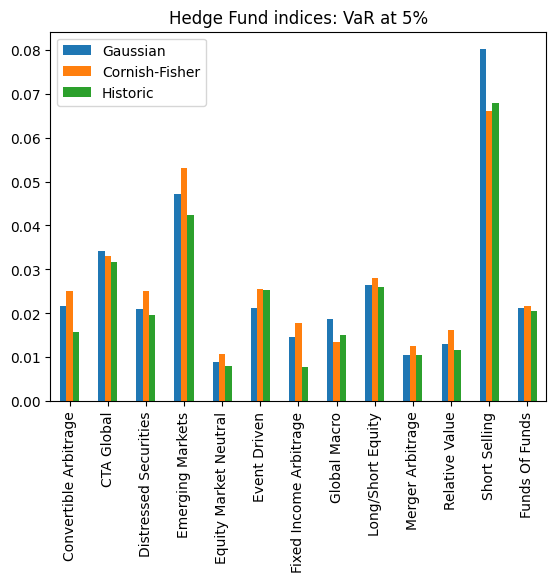

In [74]:
var_table = [
    port.var_gaussian(hfi),
    port.var_gaussian(hfi, modified = True),
    port.var_historic(hfi),
]

comparison = pd.concat(var_table, axis = 1)
comparison.columns = ['Gaussian', "Cornish-Fisher", "Historic"]
comparison.plot.bar(title = "Hedge Fund indices: VaR at 5%")

Note that in some cases, the cornish-fisher VaR is lower, i.e., estimates a smaller loss than you would get from a pure gaussian assumption. That can happen if the observed skewness is positive, as is the case for "Short Selling" and "Global Macro".

In [78]:
port.skewness(hfi).sort_values()
# As we can see, Global Marco, Short Selling and CTA global have positive skewness value, causing Cornish-Fisher VaR is lower.

Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64